In [1]:
%load_ext autoreload
%autoreload 2

# Pyomo Example
* Reference: https://jckantor.github.io/ND-Pyomo-Cookbook/
* Install
   * pip install pyomo
   * In command line - apt install coinor-cbc

# 0.0 Imports 

In [18]:
import pyomo.environ as pe
import matplotlib.pyplot as plt
import numpy as np

# 1.0 Test Model 1 - One Objective
* Chapter 2.1

In [2]:
model = pe.ConcreteModel()

#set decision variable
#
model.x = pe.Var(domain=pe.NonNegativeReals)

#declear obejective function
model.profit = pe.Objective(expr=40*model.x, sense=pe.maximize)

#declear constraints
model.demand = pe.Constraint(expr = model.x <= 40)
model.laborA = pe.Constraint(expr = model.x <= 80)
model.laborB = pe.Constraint(expr = 2*model.x <= 100)

#solve
pe.SolverFactory('cbc').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1600.0
  Upper bound: 1600.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 2
  Number of nonzeros: 0
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created 

Outcome

In [3]:
print("Profit = ", model.profit(), " per week")
print("X = ", model.x(), " units per week")

Profit =  1600.0  per week
X =  40.0  units per week


# 2.0 Mixed objective Strategy

In [10]:
model2 = pe.ConcreteModel()

#set decision variables
model2.x = pe.Var(domain=pe.NonNegativeReals)
model2.y = pe.Var(domain=pe.NonNegativeReals)

#declear objective
model2.profit = pe.Objective(expr=40*model2.x + 30*model2.y,
                             sense=pe.maximize)

#declare constrains
model2.demand = pe.Constraint(expr = model2.x <=40)
model2.laborA = pe.Constraint(expr = model2.x + model2.y <= 80)
model2.laborB = pe.Constraint(expr = 2*model2.x + model2.y <= 100)

pe.SolverFactory('cbc').solve(model2).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 2600.0
  Upper bound: 2600.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 3
  Number of nonzeros: 2
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created s

In [11]:
# display solution
print("Profit = ", model2.profit())
print("Units of X = ", model2.x())
print("Units of Y = ", model2.y())

Profit =  2600.0
Units of X =  20.0
Units of Y =  60.0


# 2.1 Visualization

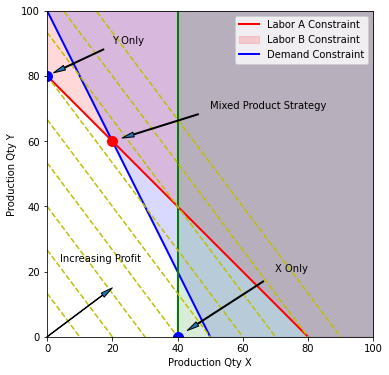

In [27]:
plt.figure(figsize=(6, 6))
plt.subplot(111, aspect='equal')
plt.axis([0, 100, 0, 100])
plt.xlabel('Production Qty X')
plt.ylabel('Production Qty Y')

#labor a constraint
x = np.array([0, 80])
y = 80 - x
plt.plot(x, y, 'r', lw=2)
plt.fill_between([0, 80, 100], [80, 0,0 ], [100, 100, 100], color='r', alpha=0.15)

# Labor B constraint
x = np.array([0, 50])
y = 100 - 2*x
plt.plot(x, y, 'b', lw=2)
plt.fill_between([0, 50, 100], [100, 0, 0], [100, 100, 100], color='b', alpha=0.15)

# Demand constraint
plt.plot([40, 40], [0, 100], 'g', lw=2)
plt.fill_between([40, 100], [0, 0], [100, 100], color='g', alpha=0.15)

#legend
plt.legend(['Labor A Constraint', 'Labor B Constraint', 'Demand Constraint'])

#profit contour, indiffernece curves 
x = np.array([0, 100])
for p in np.linspace(0, 3600, 10):
    y = (p - 40*x)/30
    plt.plot(x, y, 'y--')
    
#plot optimum
plt.plot(20, 60, 'r.', ms=20)
plt.annotate('Mixed Product Strategy', xy=(20, 60), xytext=(50, 70), 
             arrowprops=dict(shrink=.1, width=1, headwidth=5))

plt.plot(0, 80, 'b.', ms=20)
plt.annotate('Y Only', xy=(0, 80), xytext=(20, 90), 
             arrowprops=dict(shrink=0.1, width=1, headwidth=5))

plt.plot(40, 0, 'b.', ms=20)
plt.annotate('X Only', xy=(40, 0), xytext=(70, 20), 
             arrowprops=dict(shrink=0.1, width=1, headwidth=5))

plt.text(4, 23, 'Increasing Profit')
plt.annotate('', xy=(20,15), xytext=(0,0), 
             arrowprops=dict(width=0.5,headwidth=5))

plt.show()

# 3.0 DND 

* Spendable Attributes:
    * Health
    * Movement
    * Actions (Battle, Move, Bonus)
    * Mutual Support
    * Damage